In [2]:
# Initial imports, import pnadas_datareader as pdr
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [3]:
aapl_historical_path = Path('/Users/pyaghmaei/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/aapl_historical.csv')
algo_returns_path = Path('/Users/pyaghmaei/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv')
cost_historical_path = Path('/Users/pyaghmaei/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/cost_historical.csv')
goog_historical_path = Path('/Users/pyaghmaei/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/goog_historical.csv')
sp500_history_path = Path('/Users/pyaghmaei/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv')
whale_returns_path = Path('/Users/pyaghmaei/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv')

In [4]:
# Data Cleaning
# read the CSV files into DataFrames
# perform any necessary data cleaning steps. 
# After cleaning, combine all DataFrames into a single DataFrame.


In [5]:
 # Reading whale returns
df_whales = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)  
df_whales.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [6]:
df_whales.shape

(1060, 4)

In [7]:
# count
df_whales.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [8]:
# count nulls
df_whales.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
# Drop nulls
# df_whales2 = df_whales.dropna(how = 'all').shape    
df_whales = df_whales.dropna() 

In [10]:
df_whales.shape

(1059, 4)

In [11]:
df_whales.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [12]:
df_whales.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [13]:
# Reading algorithmic returns
# df_algo = pd.read_csv(algo_returns_path)  
df_algo = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)  
df_algo.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [14]:
df_algo.shape

(1241, 2)

In [15]:
 # Count nulls
df_algo.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [16]:
 # Drop nulls
df_algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [17]:
df_algo = df_algo.dropna()

In [18]:
df_algo.shape

(1235, 2)

In [19]:
# checking there are no null values for Algo 2
df_algo['Algo 2'] = df_algo['Algo 2'].fillna(0)
df_algo['Algo 2'].isnull().sum()

0

In [20]:
#df_algo.set_index(pd.to_datetime(df_algo['Date'], infer_datetime_format=True), inplace=True)
#df_algo.head()

In [21]:
df_algo.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [22]:
# Reading S&P 500 Closing Prices
# df_SP500 = pd.read_csv(sp500_history_path)  
df_SP500 = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)  
df_SP500.head(10)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
2019-04-15,$2905.58
2019-04-12,$2907.41
2019-04-11,$2888.32
2019-04-10,$2888.21


In [23]:
# identify rows and columns
df_SP500.shape  

(1649, 1)

In [24]:
# check rows and data type
df_SP500.count()

Close    1649
dtype: int64

In [25]:
df_SP500.dtypes

Close    object
dtype: object

In [26]:
# Fix Data Types by removing $
df_SP500['Close'] = df_SP500['Close'].str.replace('$','')
df_SP500['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [27]:
# Change data type for close to float
df_SP500['Close'] = df_SP500['Close'].astype('float')
df_SP500['Close'].dtype

dtype('float64')

In [28]:
df_SP500.shape

(1649, 1)

In [29]:
# Calculate Daily Returns
df_SP500 = df_SP500.pct_change().dropna()
df_SP500.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [30]:
# Drop nulls
df_SP500.isnull().sum()

Close    0
dtype: int64

In [31]:
df_SP500.dtypes

Close    float64
dtype: object

In [32]:
df_SP500.shape

(1648, 1)

In [33]:
# Rename `Close` Column to be specific to this portfolio
columns = ['S&P 500']
df_SP500.columns=columns
df_SP500.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [34]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_combined_returns = pd.concat([df_whales, df_algo, df_SP500], axis='columns', join='inner')
df_combined_returns.sort_index(inplace=True)
df_combined_returns.head(25)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


<AxesSubplot:xlabel='Date'>

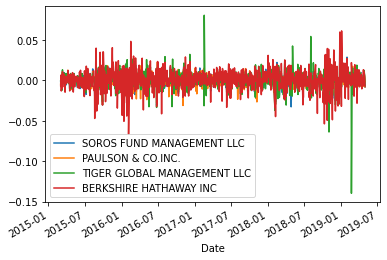

In [35]:
# Plot daily returns of all portfolios
df_whales.plot()

<AxesSubplot:xlabel='Date'>

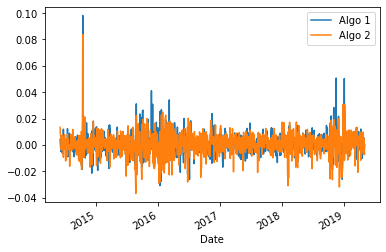

In [36]:
df_algo.plot()

<AxesSubplot:xlabel='Date'>

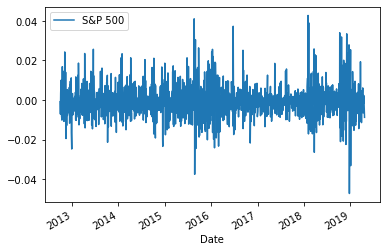

In [37]:
df_SP500.plot()

<AxesSubplot:xlabel='Date'>

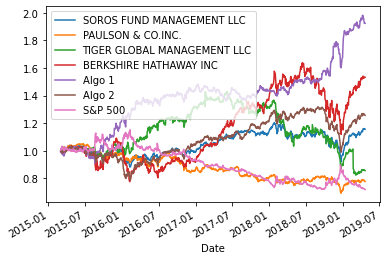

In [38]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + df_combined_returns).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot()

<AxesSubplot:>

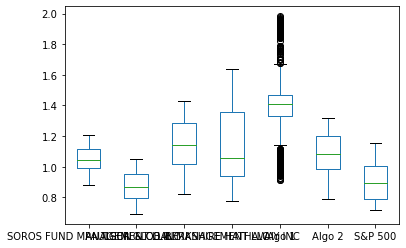

In [39]:
# Box plot to visually show risk
cumulative_returns.plot.box()

In [40]:
# Calculate the daily standard deviations of all portfolios
volatility_all = cumulative_returns.std()
volatility_all.sort_values(inplace = True)
volatility_all  

SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
S&P 500                        0.114846
Algo 2                         0.131642
TIGER GLOBAL MANAGEMENT LLC    0.149652
Algo 1                         0.231772
BERKSHIRE HATHAWAY INC         0.241382
dtype: float64

In [41]:
 # Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
volatility = df_SP500.std()
volatility.sort_values(inplace = True)
volatility

S&P 500    0.008135
dtype: float64

In [42]:
 # Calculate the annualized standard deviation (252 trading days)
volatility = df_SP500.std()*np.sqrt(252)
volatility.sort_values(inplace = True)
volatility

S&P 500    0.129133
dtype: float64

In [43]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviationm

<AxesSubplot:xlabel='Date'>

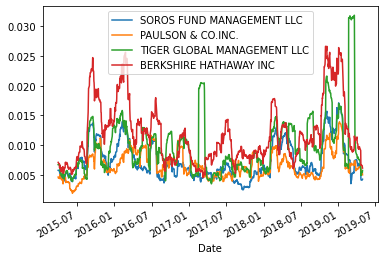

In [44]:
df_whales.rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

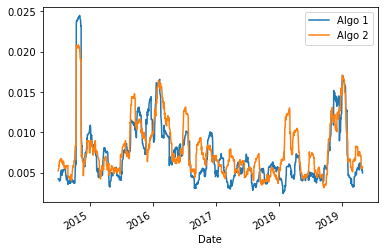

In [45]:
df_algo.rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

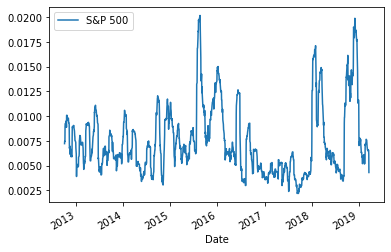

In [46]:
df_SP500.rolling(window=21).std().plot()

In [47]:
# Calculate the correlation
# Display de correlation matrix
correlation = df_combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [48]:
# Calculate covariance of a single portfolio
soros_covariance = df_combined_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(df_combined_returns['S&P 500'])
soros_covariance


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000006
2019-04-16    0.000005
2019-04-17    0.000005
2019-04-18    0.000005
2019-04-22    0.000006
Length: 1042, dtype: float64

In [49]:
# Calculate variance of S&P 500
variance = df_combined_returns['S&P 500'].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P 500, Length: 1042, dtype: float64

In [50]:
# Computing beta

# Plot beta trend
soros_beta = soros_covariance/variance
print(f"Soros: {soros_beta}")

Soros: Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.141215
2019-04-16    0.136559
2019-04-17    0.132103
2019-04-18    0.132217
2019-04-22    0.159096
Length: 1042, dtype: float64


<AxesSubplot:xlabel='Date'>

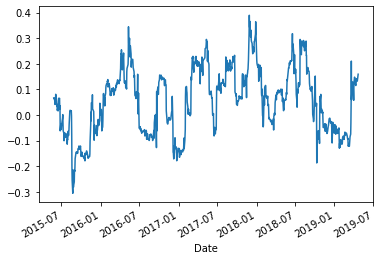

In [51]:
soros_beta.plot()


<AxesSubplot:xlabel='Date'>

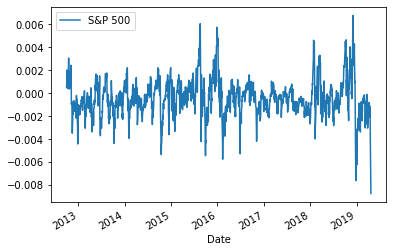

In [52]:
# Use `ewm` to calculate the rolling window
df_emw=df_SP500.ewm(span=21).mean()  
df_emw.plot() 

In [53]:
correlation.sum(axis=0).sort_values()

S&P 500                        0.962607
Algo 1                         2.299213
TIGER GLOBAL MANAGEMENT LLC    3.089243
PAULSON & CO.INC.              3.639847
BERKSHIRE HATHAWAY INC         3.689310
Algo 2                         3.985390
SOROS FUND MANAGEMENT LLC      4.163224
dtype: float64

In [54]:
# Annualize Sharp Ratio
sharp_ratio2 = (df_combined_returns.mean()*252)/(df_combined_returns.std()* np.sqrt(252))
sharp_ratio2

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

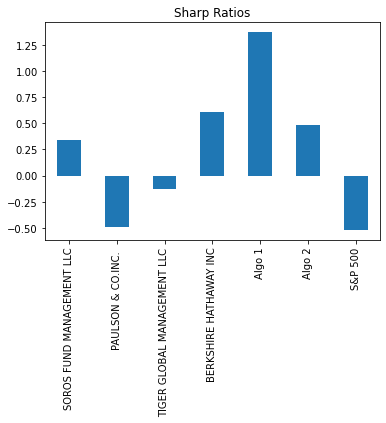

In [55]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio2.plot(kind="bar", title="Sharp Ratios")

In [56]:
# build your own portfolio of stocks (3-5)

In [57]:
 # Reading data from 1st stock
df_GOOG = pd.read_csv(goog_historical_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)  
df_GOOG.head(10)    

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
2019-05-02,GOOG,1162.61
2019-05-01,GOOG,1168.08
2019-04-30,GOOG,1188.48
2019-04-29,GOOG,1287.58


In [58]:
# Drop symbol column
df_GOOG=df_GOOG.drop(columns=['Symbol'])
df_GOOG.sort_index(inplace=True)
df_GOOG.head()

,NOCP
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [59]:
# Reading data from 2nd stock
df_APPL = pd.read_csv(aapl_historical_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)  
df_APPL.head(10)

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
2019-05-02,AAPL,209.15
2019-05-01,AAPL,210.52
2019-04-30,AAPL,200.67
2019-04-29,AAPL,204.61


In [60]:
# Drop symbol column
df_APPL=df_APPL.drop(columns=['Symbol'])
df_APPL.sort_index(inplace=True)
df_APPL.head()

,NOCP
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [61]:
# Reading data from 3rd stock
df_COST = pd.read_csv(cost_historical_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)  
df_COST.head(10)

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
2019-05-02,COST,242.69
2019-05-01,COST,241.59
2019-04-30,COST,245.53
2019-04-29,COST,244.28


In [62]:
df_COST=df_COST.drop(columns=['Symbol'])
df_COST.sort_index(inplace=True)
df_COST.head()

,NOCP
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [63]:
# Combine all stocks in a single DataFrame, sort by date
df_combined = pd.concat([df_GOOG, df_APPL, df_COST], axis="columns", join="inner")
df_combined.sort_index(inplace=True)
df_combined.columns=['GOOG','APPL','COST']
df_combined.head()

,GOOG,APPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [64]:
 # Reset Date index

In [65]:
 # Reorganize portfolio data by having a column per symbol

In [66]:
# Calculate daily returns
daily_returns=df_combined.pct_change().dropna()
daily_returns.head()
# Drop NAs

# Display sample data

,GOOG,APPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


In [67]:
# Set weights
# weights = [1/3, 1/3, 1/3]
weights=[.33,.33,.33]
# Calculate portfolio return
portfolio_returns=daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.009963
2018-05-16    0.009309
2018-05-17   -0.001579
2018-05-18   -0.006000
dtype: float64

In [68]:
# Join your returns DataFrame to the original returns DataFrame
df_combined_returns = pd.concat([daily_returns, portfolio_returns], axis="columns", join="inner")
df_combined_returns.sort_index(inplace=True)
df_combined_returns.columns=['GOOG','APPL','COST','Portfolio']
df_combined_returns.head(20)

,GOOG,APPL,COST,Portfolio
Trade DATE,,,,
2018-05-14,0.001766,-0.002333,0.000613,0.000015
2018-05-15,-0.019060,-0.009088,-0.002042,-0.009963
2018-05-16,0.002354,0.009333,0.016523,0.009309
2018-05-17,-0.002940,-0.006324,0.004479,-0.001579
2018-05-18,-0.011339,-0.003637,-0.003206,-0.006000
2018-05-21,0.012397,0.007085,0.003317,0.007524
2018-05-22,-0.009124,-0.002505,-0.003256,-0.004912
2018-05-23,0.009311,0.006412,-0.004171,0.003812
2018-05-24,-0.000417,-0.001115,0.003785,0.000744


In [69]:
df_combined_returns.shape

(249, 4)

In [70]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_combined_returns.dropna()
df_combined_returns.head()

,GOOG,APPL,COST,Portfolio
Trade DATE,,,,
2018-05-14,0.001766,-0.002333,0.000613,0.000015
2018-05-15,-0.019060,-0.009088,-0.002042,-0.009963
2018-05-16,0.002354,0.009333,0.016523,0.009309
2018-05-17,-0.002940,-0.006324,0.004479,-0.001579
2018-05-18,-0.011339,-0.003637,-0.003206,-0.006000


In [71]:
df_combined_returns.shape

(249, 4)

In [72]:
 # Calculate the annualized `std`
volitality = df_combined_returns.std() * np.sqrt(252)
volitality.sort_values(inplace=True)
volitality

Portfolio    0.208159
COST         0.209320
GOOG         0.263554
APPL         0.296955
dtype: float64

<AxesSubplot:xlabel='Trade DATE'>

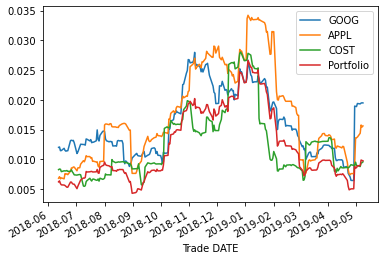

In [73]:
 # Calculate rolling standard deviation (21 day)
df_combined_returns.rolling(window=21).std().plot()
# Plot rolling standard deviation

In [74]:
 # Calculate and plot the correlation
correlation = df_combined_returns.corr()
correlation

,GOOG,APPL,COST,Portfolio
GOOG,1.000000,0.655007,0.385145,0.853984
APPL,0.655007,1.000000,0.413546,0.881676
COST,0.385145,0.413546,1.000000,0.687446
Portfolio,0.853984,0.881676,0.687446,1.000000


<AxesSubplot:>

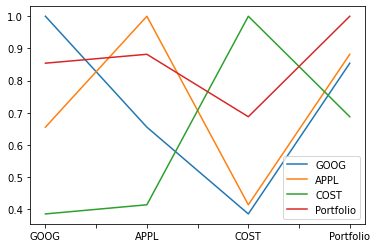

In [75]:
correlation.plot()

In [76]:
# Calculate and plot Beta - 60day - Portfolio vs S&P500
Portfolio_beta_rolling = df_combined_returns['Portfolio'].rolling(window=60).cov(df_SP500['S&P 500'])
Portfolio_beta_rolling.dropna()
Portfolio_beta_rolling

2012-10-01   NaN
2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
              ..
2019-05-03   NaN
2019-05-06   NaN
2019-05-07   NaN
2019-05-08   NaN
2019-05-09   NaN
Length: 1661, dtype: float64

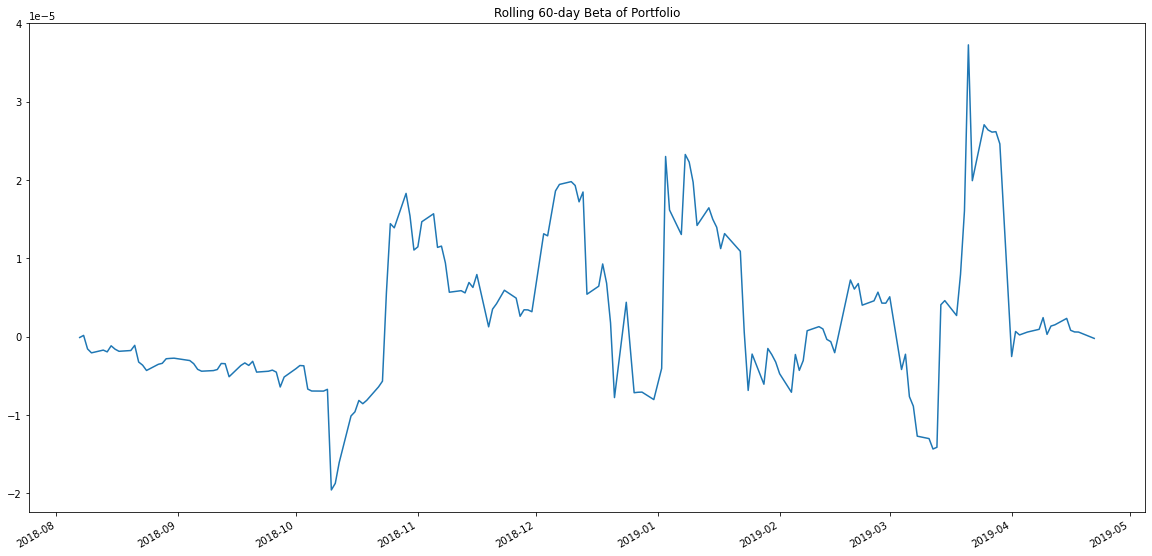

In [77]:
ax = Portfolio_beta_rolling.plot(figsize=(20,10), title='Rolling 60-day Beta of Portfolio')


In [79]:
# sharpe ratios as a bar plot
sharp_ratio = (df_combined_returns.mean()*252)/(df_combined_returns.std()* np.sqrt(252))
sharp_ratio

GOOG         0.349657
APPL         0.361306
COST         1.160482
Portfolio    0.701280
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

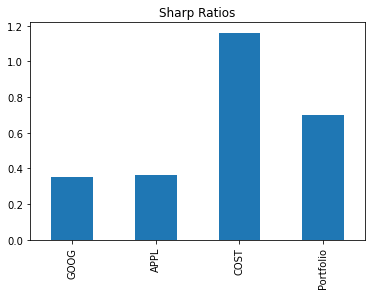

In [81]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind="bar", title="Sharp Ratios")